# IMPORT FILE AND LIBRARIES

In [ ]:
pip install pycountry_convert

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import warnings
import datetime
import pycountry_convert as pc
import seaborn as sns
import matplotlib.colors as mcolors
from plotly.subplots import make_subplots
from collections import Counter


# CHƯƠNG 2: TRỰC QUAN DỮ LIỆU THÔ

In [ ]:
netflix = pd.read_csv('netflix_titles.csv')

In [ ]:
# 1. Thông tin tổng quan về số dòng, số cột
# Hiển thị số dòng và cột
num_rows, num_columns = netflix.shape
column_names = netflix.columns.tolist()
print(f"Số lượng quan sát: {num_rows}")
print(f"Số lượng cột: {num_columns}\n")
print("Các cột hiện có bao gồm:")
for col in column_names:
    print(col)

Số lượng quan sát: 8807
Số lượng cột: 12

Các cột hiện có bao gồm:
show_id
type
title
director
cast
country
date_added
release_year
rating
duration
listed_in
description


In [ ]:
# 2. Kiểm tra giá trị bị thiếu
missing_values = netflix.isnull().sum()
total_missing = missing_values.sum()
missing_percentage = (total_missing / (num_rows * num_columns)) * 100

print("\nSố giá trị bị thiếu trong mỗi cột:")
print(missing_values[missing_values > 0])
print(f"\nTổng số giá trị bị thiếu: {total_missing}")
print(f"Tỷ lệ giá trị bị thiếu: {missing_percentage:.2f}%")


Số giá trị bị thiếu trong mỗi cột:
director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

Tổng số giá trị bị thiếu: 4307
Tỷ lệ giá trị bị thiếu: 4.08%


In [ ]:
# 3. Vị trí các giá trị bị thiếu
print("\nDòng và cột có giá trị bị thiếu:")
rows_with_missing = netflix[netflix.isnull().any(axis=1)]
rows_with_missing.head()


Dòng và cột có giá trị bị thiếu:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# 4. Tỷ lệ phần trăm giá trị bị thiếu trong mỗi cột
missing_percentage_per_column = (missing_values / num_rows) * 100
print("\nTỷ lệ phần trăm giá trị bị thiếu trong mỗi cột:")
print(missing_percentage_per_column[missing_percentage_per_column > 0])


Tỷ lệ phần trăm giá trị bị thiếu trong mỗi cột:
director      29.908028
cast           9.367549
country        9.435676
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64


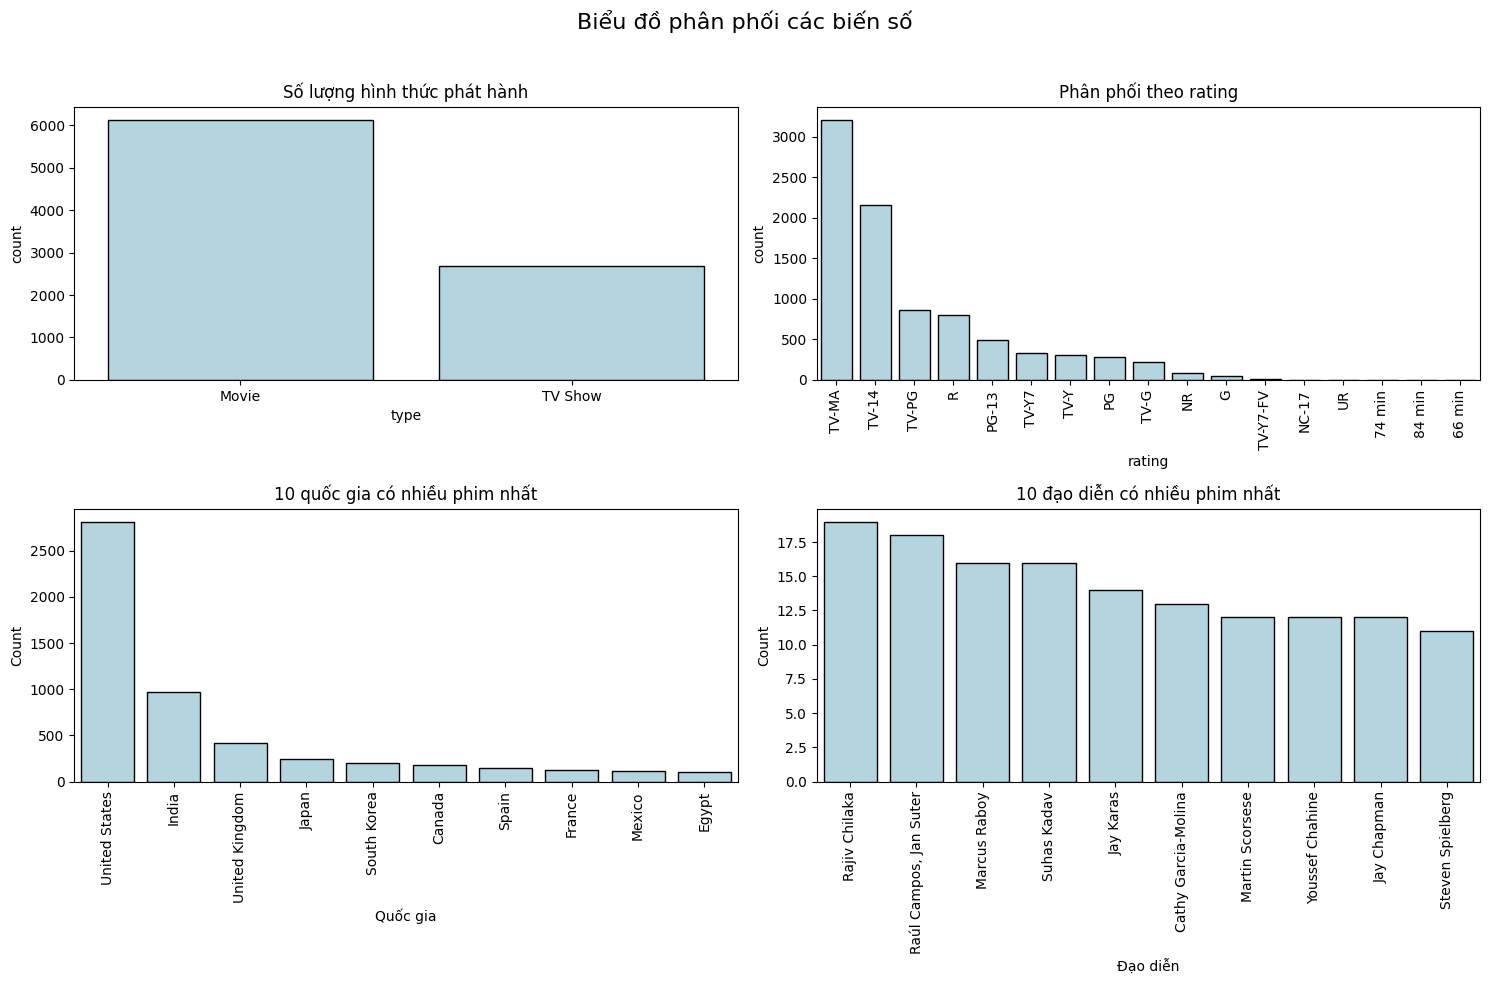

In [ ]:
# Tạo lưới 2x3
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Biểu đồ phân phối các biến số", fontsize=16)

# 1. Biểu đồ count type of movies
sns.countplot(x='type', data=netflix, color='lightblue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Số lượng hình thức phát hành')

# 2. Count rating
sns.countplot(x='rating', data=netflix, color='lightblue', edgecolor='black', order=netflix['rating'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('Phân phối theo rating')
axes[0, 1].tick_params(axis='x', rotation=90)

# 3. Top 10 countries with most movies, if 'Unknown' bỏ qua
country = netflix[netflix['country'] != 'Unknown']['country'].value_counts().head(10)
sns.barplot(y=country.values, x=country.index, edgecolor='black', color='lightblue', ax=axes[1, 0])
axes[1, 0].set_title('10 quốc gia có nhiều phim nhất')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xlabel('Quốc gia')
axes[1, 0].tick_params(axis='x', rotation=90)

# 4. Top 10 directors with most movies
director = netflix[netflix['director'] != 'Unknown']['director'].value_counts().head(10)
sns.barplot(y=director.values, x=director.index, edgecolor='black', color='lightblue', ax=axes[1, 1])
axes[1, 1].set_title('10 đạo diễn có nhiều phim nhất')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xlabel('Đạo diễn')
axes[1, 1].tick_params(axis='x', rotation=90)

# Tự động điều chỉnh bố cục
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


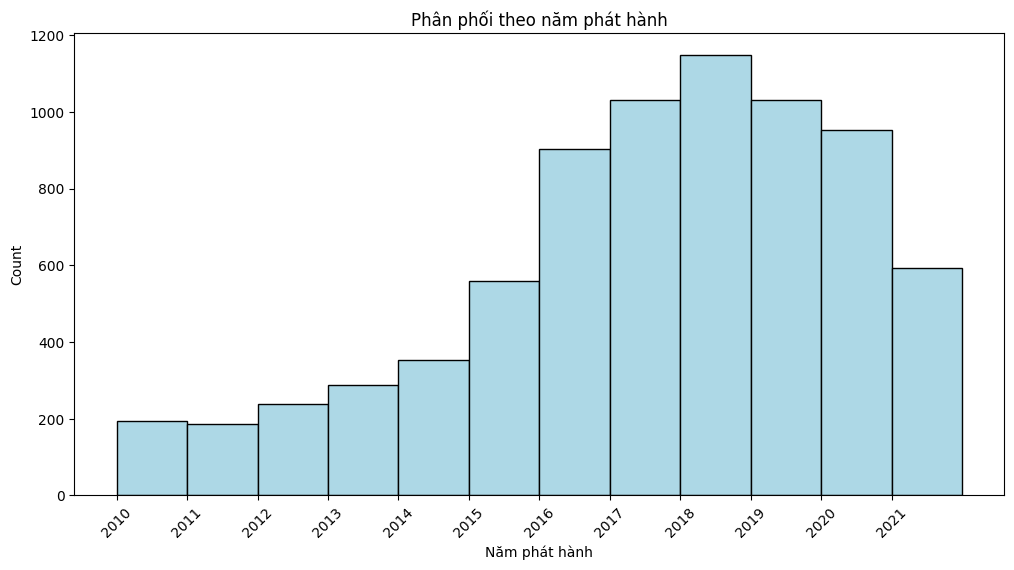

In [ ]:
# Hiển thị số lượng năm phát hành, sắp xếp theo năm từ 2010 bằng biểu đồ histogram
plt.figure(figsize=(12, 6))
filtered_netflix = netflix[netflix['release_year'] >= 2010]
filtered_netflix['release_year'].hist(bins=range(2010, filtered_netflix['release_year'].max() + 2), color='lightblue', edgecolor='black')
plt.title('Phân phối theo năm phát hành')
plt.ylabel('Count')
plt.xlabel('Năm phát hành')
plt.xticks(range(2010, filtered_netflix['release_year'].max() + 1), rotation=45)
plt.grid(False)
plt.show()


# CHƯƠNG 3: THÊM CỘT

In [ ]:
def get_categorize_duration(minutes):
    if minutes == 'is season':
        return 'is season'
    elif minutes == 'Unknown':
        return 'Unknown'
    elif int(minutes) < 60:
        return "Short"
    elif 60 <= int(minutes) <= 120:
        return "Medium"
    else:
        return "Long"

In [ ]:
def get_content_type(rating):
    if rating in ['TV-MA', 'R', 'NC-17']:
        return 'Adult'
    elif rating in ['TV-14', 'PG-13']:
        return 'Teen'
    elif rating in ['TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G', 'PG', 'TV-G']:
        return 'Family'
    else:
        return 'Unrated'

In [ ]:
def get_continent(country):
    valid_continents = {'Africa', 'Antarctica', 'Asia', 'Europe', 'North America', 'South America', 'Oceania'}
    continents = set()

    for country_name in country.split(','):
        country_name = country_name.strip()

        if country_name == 'Unknown':
            continents.add(country_name)
        elif len(country_name) <= 3:
            continents.add('Unknown')
        else:
            try:
                country_alpha2 = pc.country_name_to_country_alpha2(country_name)
                country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
                country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
                if country_continent_name in valid_continents:
                    if country_continent_name in ['North America', 'South America']:
                        continents.add('America')
                    else:
                        continents.add(country_continent_name)
            except KeyError:
                continents.add('Unknown') # Nếu tên quốc gia đã không còn hoặc không xác định được
                continue

    return ', '.join(continents)


In [ ]:
def add_column(df):
    df = df.copy()
    df.fillna('Unknown', inplace=True)
    df['date_added'] = df['date_added'].str.strip()

    # Thêm cột day_added, weekday_added, month_added, quarter_added, year_added, season_added
    df['date_added_datetime'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['month_added'] = df['date_added_datetime'].dt.month.astype('Int64')
    df['year_added'] = df['date_added_datetime'].dt.year.astype('Int64')
    df.drop('date_added_datetime', axis=1, inplace=True)


    # Thêm cột has_seasons, duration_minutes
    df['has_seasons'] = df['duration'].apply(lambda x: x.split(' ')[0] if 'Season' in x else 'has no season')
    df['duration_minutes'] = df['duration'].apply(lambda x: x.split(' ')[0] if 'Season' not in x else 'is season')
    df['duration_category'] = df['duration_minutes'].apply(get_categorize_duration)


    # Thêm cột content_type
    df['content_type'] = df['rating'].apply(get_content_type)


    # Thêm cột region, multi_country
    df['region'] = df['country'].apply(get_continent)
    df['multi_country'] = df['country'].apply(lambda x: 1 if ',' in x else 0)

    return df

In [ ]:
df = add_column(netflix)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   show_id            8807 non-null   object
 1   type               8807 non-null   object
 2   title              8807 non-null   object
 3   director           8807 non-null   object
 4   cast               8807 non-null   object
 5   country            8807 non-null   object
 6   date_added         8807 non-null   object
 7   release_year       8807 non-null   int64 
 8   rating             8807 non-null   object
 9   duration           8807 non-null   object
 10  listed_in          8807 non-null   object
 11  description        8807 non-null   object
 12  month_added        8797 non-null   Int64 
 13  year_added         8797 non-null   Int64 
 14  has_seasons        8807 non-null   object
 15  duration_minutes   8807 non-null   object
 16  duration_category  8807 non-null   object


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,has_seasons,duration_minutes,duration_category,content_type,region,multi_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021,has no season,90,Medium,Teen,America,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021,2,is season,is season,Adult,Africa,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021,1,is season,is season,Adult,Unknown,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021,1,is season,is season,Adult,Unknown,0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021,2,is season,is season,Adult,Asia,0


# Chương 4: TIỀN XỬ LÝ DỮ LIỆU

In [ ]:
missing_values = df.isnull().sum()
print("Các cột có giá trị bị thiếu:")
for column, count in missing_values.items():
    if count > 0:
        print(f"{column}: {count}")

Các cột có giá trị bị thiếu:
month_added: 10
year_added: 10


In [ ]:
# Xoá các dòng có year_added < release_year
count += df[df['year_added'] < df['release_year']].shape[0]
df = df[df['year_added'] >= df['release_year']]

print('Số quan sát bị xóa: ', count)
print('Tổng số quan sát sau khi xóa: ', df.shape[0])

Số quan sát bị xóa:  14
Tổng số quan sát sau khi xóa:  8783


In [ ]:
print(df['rating'].unique(), '\n\n\n')

# Xoá các dòng có rating = '74 min' or '84 min' or '66 min'
count = df[(df['rating'] == '74 min') | (df['rating'] == '84 min') | (df['rating'] == '66 min')].shape[0]
df = df[(df['rating'] != '74 min') & (df['rating'] != '84 min') & (df['rating'] != '66 min')]

print('Số quan sát bị xóa: ', count)
print('Tổng số quan sát sau khi xóa: ', df.shape[0])

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'Unknown' 'TV-Y7-FV' 'UR'] 



Số quan sát bị xóa:  3
Tổng số quan sát sau khi xóa:  8780


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8780 entries, 0 to 8806
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   show_id            8780 non-null   object
 1   type               8780 non-null   object
 2   title              8780 non-null   object
 3   director           8780 non-null   object
 4   cast               8780 non-null   object
 5   country            8780 non-null   object
 6   date_added         8780 non-null   object
 7   release_year       8780 non-null   int64 
 8   rating             8780 non-null   object
 9   duration           8780 non-null   object
 10  listed_in          8780 non-null   object
 11  description        8780 non-null   object
 12  month_added        8780 non-null   Int64 
 13  year_added         8780 non-null   Int64 
 14  has_seasons        8780 non-null   object
 15  duration_minutes   8780 non-null   object
 16  duration_category  8780 non-null   object
 17  

# Chương 5: TRỰC QUAN

## 1. Time series

### 1.1. Số lượng nội dung được thêm vào theo tháng và năm

In [ ]:
df[df['year_added'] == 2021]['month_added'].unique()

<IntegerArray>
[9, 8, 7, 6, 5, 4, 3, 2, 1]
Length: 9, dtype: Int64

Giải thích: vì năm 2021 chỉ có tháng 1 - 9 được add vào -> ảnh hưởng đến hình dạng của biểu đồ đường -> không lấy năm này -> lấy từ năm 2017 trở đi

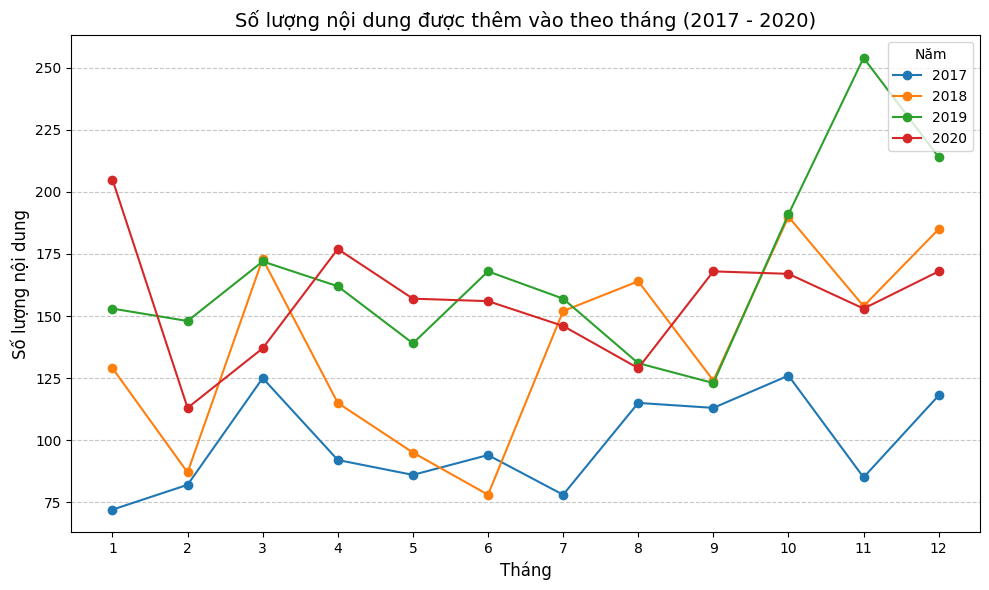

In [ ]:
df_filtered = df[df['year_added'].isin([2017, 2018, 2019, 2020])]
monthly_data = df_filtered.groupby(['year_added', 'month_added']).size().reset_index(name='count')
months = range(1, 13)  # 12 tháng
years = [2017, 2018, 2019, 2020]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
for year in years:
    data_by_year = monthly_data[monthly_data['year_added'] == year]
    counts = [data_by_year[data_by_year['month_added'] == month]['count'].sum() for month in months]
    plt.plot(months, counts, marker='o', label=str(year))


# Cấu hình biểu đồ
plt.title('Số lượng nội dung được thêm vào theo tháng (2017 - 2020)', fontsize=14)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Số lượng nội dung', fontsize=12)
plt.xticks(months, fontsize=10)
plt.legend(title='Năm', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


### 1.2. Biểu đồ chấm theo năm phát hành và thời lượng phim

In [ ]:
print(df['duration'].unique())

['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '189 min' '141 min' '130 min' '138 min' '81 min' '132 min' '10 Seasons'
 '123 min' '65 min' '68 min' '66 min' '62 min' '74 min' '131 min' '39 min'
 '46 m

In [ ]:
# Chỉ lấy những phim ngắn tập (không có season)
temp_df = df[['release_year', 'duration']].copy()
temp_df['duration'] = temp_df['duration'].apply(lambda x: int(x.split()[0]) if 'Season' not in x else None)
temp_df = temp_df.dropna(subset=['duration'])


print(temp_df['duration'].unique())

[ 90.  91. 125. 104. 127.  67.  94. 161.  61. 166. 147. 103.  97. 106.
 111. 110. 105.  96. 124. 116.  98.  23. 115. 122.  99.  88. 100. 102.
  93.  95.  85.  83. 113.  13. 182.  48. 145.  87.  92.  80. 117. 128.
 119. 143. 114. 118. 108.  63. 121. 142. 154. 120.  82. 109. 101.  86.
 229.  76.  89. 156. 112. 107. 129. 135. 136. 165. 150. 133.  70.  84.
 140.  78.  64.  59. 139.  69. 148. 189. 141. 130. 138.  81. 132. 123.
  65.  68.  66.  62.  74. 131.  39.  46.  38. 126. 155. 159. 137.  12.
 273.  36.  34.  77.  60.  49.  58.  72. 204. 212.  25.  73.  29.  47.
  32.  35.  71. 149.  33.  15.  54. 224. 162.  37.  75.  79.  55. 158.
 164. 173. 181. 185.  21.  24.  51. 151.  42.  22. 134. 177.  52.  14.
  53.   8.  57.  28.  50.   9.  26.  45. 171.  27.  44. 146.  20. 157.
  17. 203.  41.  30. 194. 233. 237. 230. 195. 253. 152. 190. 160. 208.
 180. 144.   5. 174. 170. 192. 209. 187. 172.  16. 186.  11. 193. 176.
  56. 169.  40.  10.   3. 168. 312. 153. 214.  31. 163.  19. 179.  43.
 200. 

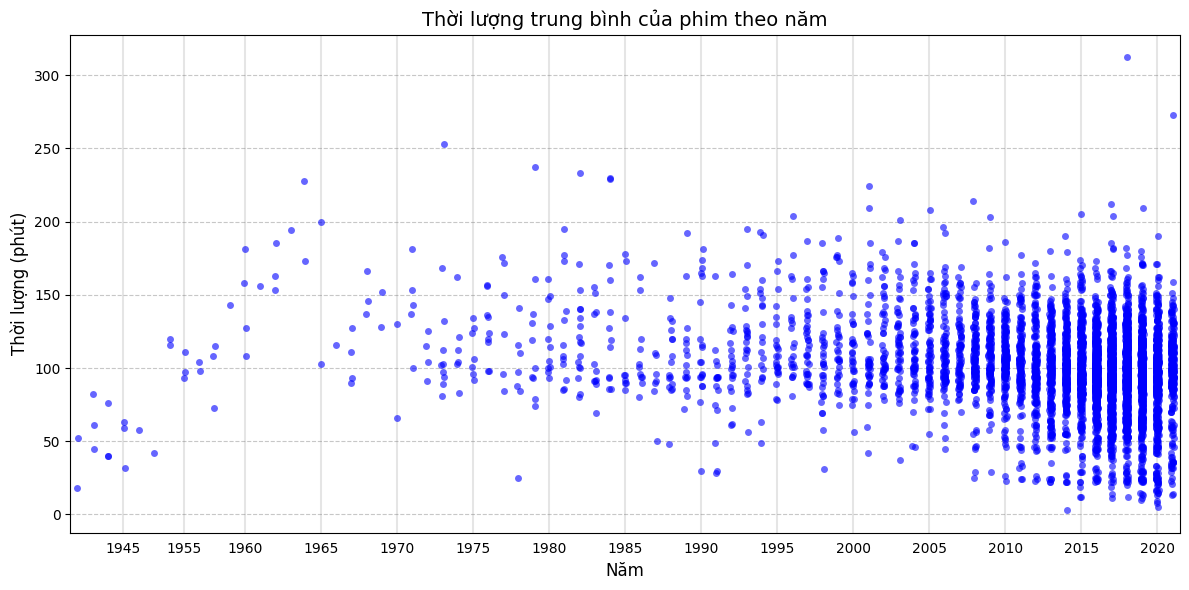

In [ ]:
# Vẽ biểu đồ dot plot
plt.figure(figsize=(12, 6))
sns.stripplot(data=temp_df, x='release_year', y='duration', color='blue', alpha=0.6)

# Cấu hình biểu đồ
plt.title('Thời lượng trung bình của phim theo năm', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Thời lượng (phút)', fontsize=12)
temp_df = temp_df.sort_values(by='release_year')
xticks = temp_df['release_year'].unique()
xtick_labels = [str(year) if year % 5 == 0 else '' for year in xticks]
plt.xticks(ticks=range(len(xticks)), labels=xtick_labels, fontsize=10)
plt.tick_params(axis='x', which='both', bottom=False)

for i, year in enumerate(xticks):
    if year % 5 == 0:
            plt.axvline(x=i, color='gray', alpha=0.2)

plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### 1.3. Biểu đồ chấm theo năm phát hành và số mùa của chương trình TV

In [ ]:
# Lọc dữ liệu từ năm 2000 đến 2020 và chọn những chương trình dài tập
temp_df = df[df['has_seasons'] != 'has no season']
temp_df = temp_df[['release_year', 'has_seasons']]
temp_df['has_seasons'] = temp_df['has_seasons'].apply(lambda x: int(x.split()[0]))
temp_df = temp_df.sort_values(by='has_seasons')


# Lọc dữ liệu từ năm 2000 đến 2020
df_filtered = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2020)]
temp_df = df_filtered[df_filtered['has_seasons'] != 'has no season']
temp_df = temp_df[['release_year', 'has_seasons']]
temp_df['has_seasons'] = temp_df['has_seasons'].apply(lambda x: int(x.split()[0]))


print(temp_df.head(10))

    release_year  has_seasons
17          2020            2
21          2018            5
32          2020            3
34          2020            1
37          2018            1
47          2020            1
50          2014            1
66          2014            1
69          2015            1
76          2013            1


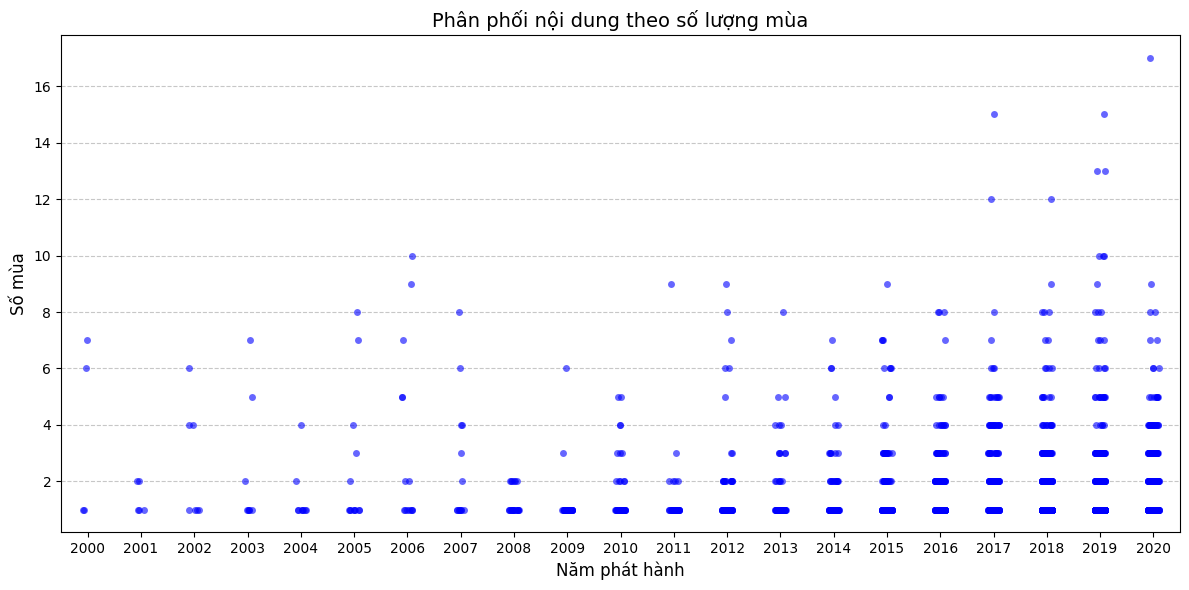

In [ ]:
# Cấu hình tiêu đề và nhãn trục
plt.figure(figsize=(12, 6))
plt.title('Phân phối nội dung theo số lượng mùa', fontsize=14)
plt.xlabel('Năm phát hành', fontsize=12)
plt.ylabel('Số mùa', fontsize=12)

# Vẽ dot plot với jitter
sns.stripplot(
    data=temp_df,
    x='release_year',
    y='has_seasons',
    color='blue',
    alpha=0.6,
    jitter=True
)

# Vẽ lưới
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


### 1.4. Số lượng phim và chương trình TV theo năm

In [ ]:
# Tính tổng số nội dung mỗi năm từ năm 2017 đến 2020
filtered_df = df[(df['release_year'] >= 2017) & (df['release_year'] <= 2020)]
type_counts = filtered_df.groupby(['release_year', 'type']).size().reset_index(name='count')
year_totals = type_counts.groupby('release_year')['count'].transform('sum')
type_counts['percentage'] = (type_counts['count'] / year_totals * 100).round(1)

print(type_counts)


   release_year     type  count  percentage
0          2017    Movie    766        74.4
1          2017  TV Show    264        25.6
2          2018    Movie    766        67.0
3          2018  TV Show    378        33.0
4          2019    Movie    632        61.5
5          2019  TV Show    395        38.5
6          2020    Movie    517        54.5
7          2020  TV Show    432        45.5


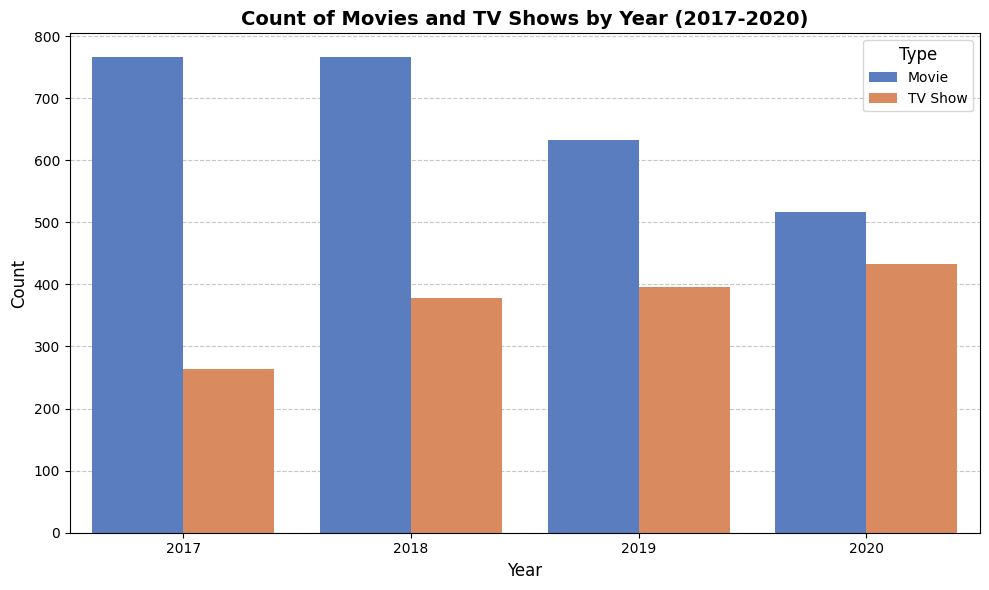

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=type_counts,
    x='release_year',
    y='count',
    hue='type',
    palette='muted'
)

# Cấu hình biểu đồ
plt.title('Count of Movies and TV Shows by Year (2017-2020)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Type', fontsize=10, title_fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in plt.gca().patches:
    bar.set_zorder(2)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


## 2. Vị trí địa lý

### 2.1.  Phân phối thời lượng của phim theo khu vực

<ipython-input-273-dd3d80a37c9a>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




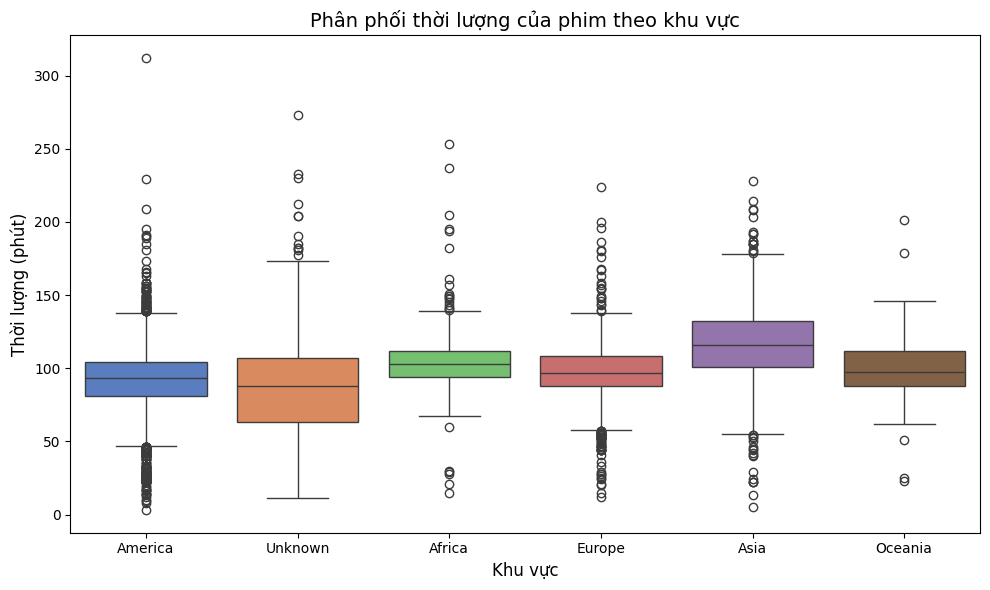

In [ ]:
# Lọc và xử lý dữ liệu liên quan đến các bộ phim (Movie)
# Chuẩn bị thông tin về duration_minutes và first-region
df_copy = df.copy()
df_copy['first-region'] = df_copy['region'].fillna('').apply(lambda x: x.split(',')[0])
df_tmp = df_copy[df_copy['type'] == 'Movie'][['duration_minutes', 'first-region']]
df_tmp['duration_minutes'] = df_tmp['duration_minutes'].astype(int)


# Vẽ boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tmp, x='first-region', y='duration_minutes', palette='muted')

# Cấu hình tiêu đề và nhãn trục
plt.title('Phân phối thời lượng của phim theo khu vực', fontsize=14)
plt.xlabel('Khu vực', fontsize=12)
plt.ylabel('Thời lượng (phút)', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### 2.2. Những quốc gia có nhiều nội dung nhất

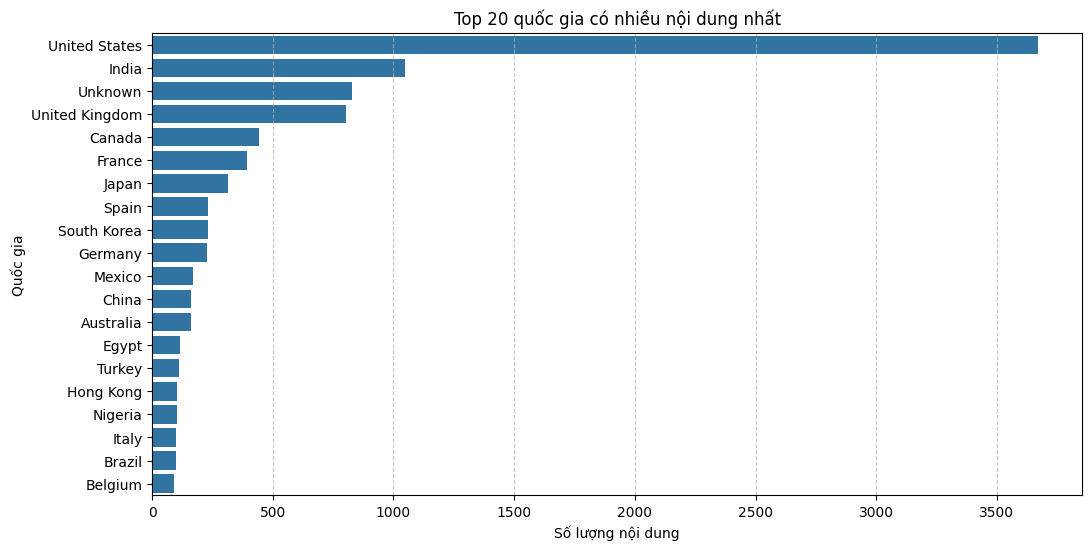

In [ ]:
# Đếm số lượng nội dung của từng quốc gia
countries = set({})
for country in df['country'].unique():
    for c in country.split(','):
        countries.add(c.strip())

country_count = {}
for country in df['country']:
    for c in country.split(','):
        c = c.strip()
        if c in country_count:
            country_count[c] += 1
        else:
            country_count[c] = 1


# Lấy 20 quốc gia có số lượng nội dung nhiều nhất
top_countries = sorted(country_count.items(), key=lambda x: x[1], reverse=True)[:20]
top_countries = dict(top_countries)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_countries.values()), y=list(top_countries.keys()))
plt.title('Top 20 quốc gia có nhiều nội dung nhất')
plt.xlabel('Số lượng nội dung')
plt.ylabel('Quốc gia')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Biểu diễn biểu đồ bar chart thành bản đồ

country_count_df = pd.DataFrame(list(country_count.items()), columns=['country', 'count'])
fig = px.choropleth(
    country_count_df,
    locations='country',
    locationmode='country names',
    color='count',
    hover_name='country',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Country Occurrences in DataFrame'
)
fig.show()

### 2.3.0. Số lượng nội dung theo từng châu lục

In [ ]:
# Create a set to store all unique regions
regions = set()

# Iterate through each unique region in the DataFrame
for region in df['region'].fillna('').unique():
    for r in region.split(','):
        r = r.strip()
        if r == '':
            r = 'Unknown'
        regions.add(r)

# Print the set of unique regions
print(regions)

{'Africa', 'Europe', 'Asia', 'America', 'Oceania', 'Unknown'}


In [ ]:
# count mỗi khu vực xuất hiện bao nhiêu lần
region_count = {}
for region in df['region'].fillna(''):
    for r in region.split(','):
        r = r.strip()
        if r in region_count:
            region_count[r] += 1
        else:
            region_count[r] = 1


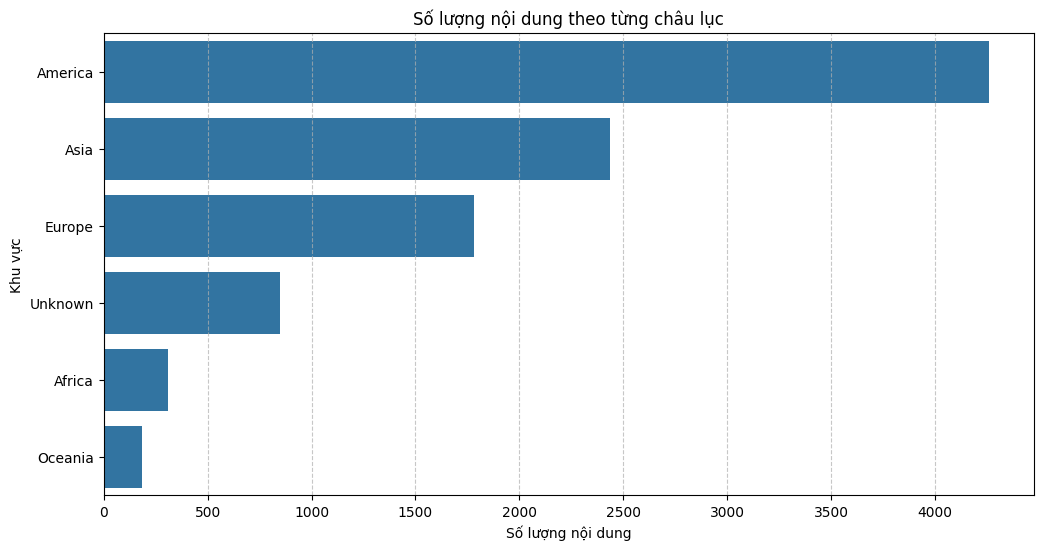

In [ ]:
# Số lượng nội dung theo từng châu lục, sắp xếp giảm dần
top_regions = sorted(region_count.items(), key=lambda x: x[1], reverse=True)[:20]
top_regions = dict(top_regions)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_regions.values()), y=list(top_regions.keys()))
plt.title('Số lượng nội dung theo từng châu lục')
plt.xlabel('Số lượng nội dung')
plt.ylabel('Khu vực')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



### 2.3.1. Đạo diễn có nhiều chương trình truyền hình nhất, với nhiều phim nhất theo châu lục

In [ ]:
# Tạo dataframe mới để lọc ra những giá trị thiếu
df_tmp = df.copy()
df_tmp = df_tmp[['type', 'director', 'region']]
df_tmp = df_tmp[df_tmp['director'] != 'Unknown']
df_tmp = df_tmp[df_tmp['region'] != 'Unknown']

In [ ]:
df_tmp.head()

,type,director,region
0,Movie,Kirsten Johnson,America
7,Movie,Haile Gerima,"Africa, Europe, America"
8,TV Show,Andy Devonshire,Europe
9,Movie,Theodore Melfi,America
12,Movie,Christian Schwochow,Europe


In [ ]:
def split_columns(df, col_name1, col_name2):
    df = df.copy()
    new_rows = []

    for index, row in df.iterrows():
        # Tách các giá trị của col_name1 và col_name2
        col1_values = row[col_name1].split(', ')
        col2_values = row[col_name2].split(', ')

        # Duyệt qua tất cả các giá trị của col1_values và col2_values, thêm dòng mới vào danh sách
        for col1 in col1_values:
            for col2 in col2_values:
                new_rows.append([row['type'], col1, col2])

    df_new = pd.DataFrame(new_rows, columns=df.columns)
    return df_new

In [ ]:
df_tmp = split_columns(df_tmp, 'director', 'region')
df_tmp.head(11)

,type,director,region
0,Movie,Kirsten Johnson,America
1,Movie,Haile Gerima,Africa
2,Movie,Haile Gerima,Europe
3,Movie,Haile Gerima,America
4,TV Show,Andy Devonshire,Europe
5,Movie,Theodore Melfi,America
6,Movie,Christian Schwochow,Europe
7,Movie,S. Shankar,Asia
8,Movie,Dennis Dugan,America
9,Movie,Scott Stewart,America


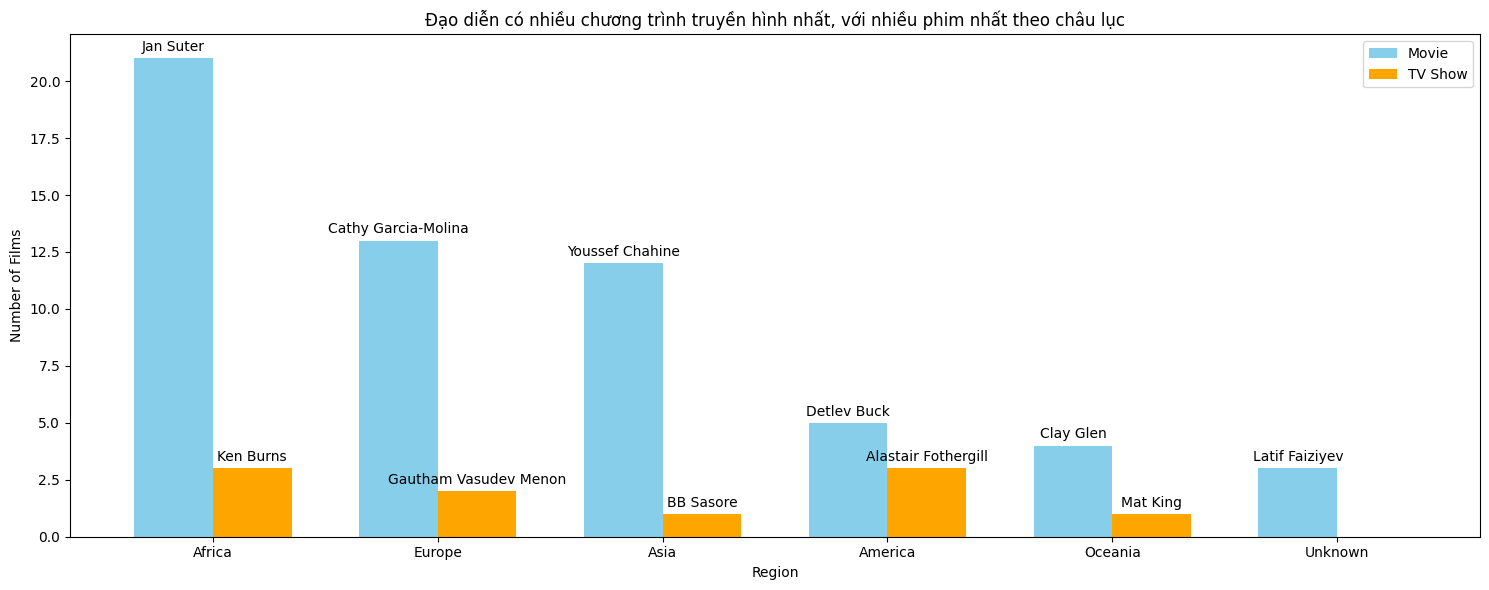

In [ ]:
# Groupby dữ liệu và tính toán số lượng phim
grouped = (df_tmp.groupby(['region', 'type', 'director']).size().reset_index(name='count'))

# Tìm đạo diễn có số lượng phim nhiều nhất trong mỗi (region, type)
top_directors = (grouped.loc[grouped.groupby(['region', 'type'])['count'].idxmax()].reset_index(drop=True))

# Tính tổng số lượng phim (Movie + TV Show) cho từng region
total_counts = (top_directors.groupby('region')['count'].sum().sort_values(ascending=False).reset_index())

# Lấy thứ tự các region dựa trên tổng số lượng phim
regions_sorted = total_counts['region']

# Chuẩn bị dữ liệu cho biểu đồ
movie_counts = []
tv_show_counts = []
movie_directors = []
tv_show_directors = []

for region in regions_sorted:
    movie_row = top_directors[(top_directors['region'] == region) & (top_directors['type'] == 'Movie')]
    tv_show_row = top_directors[(top_directors['region'] == region) & (top_directors['type'] == 'TV Show')]

    if not movie_row.empty:
        movie_counts.append(movie_row['count'].values[0])
        movie_directors.append(movie_row['director'].values[0])
    else:
        movie_counts.append(0)
        movie_directors.append(None)

    if not tv_show_row.empty:
        tv_show_counts.append(tv_show_row['count'].values[0])
        tv_show_directors.append(tv_show_row['director'].values[0])
    else:
        tv_show_counts.append(0)
        tv_show_directors.append(None)


regions = set({})
for region in df['region'].unique():
    for r in region.split(','):
        regions.add(r.strip())

# Vẽ biểu đồ
x = np.arange(len(regions))
width = 0.35
fig, ax = plt.subplots(figsize=(15, 6))
bars1 = ax.bar(x - width/2, movie_counts, width, label='Movie', color='skyblue')
bars2 = ax.bar(x + width/2, tv_show_counts, width, label='TV Show', color='orange')
ax.set_xlabel('Region')
ax.set_ylabel('Number of Films')
ax.set_title('Đạo diễn có nhiều chương trình truyền hình nhất, với nhiều phim nhất theo châu lục')
ax.set_xticks(x)
ax.set_xticklabels(regions)
ax.legend()

# Hiển thị tên đạo diễn trên đỉnh cột
for bar, director in zip(bars1, movie_directors):
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{director}',xy=(bar.get_x() + bar.get_width() / 2, height),xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')

for bar, director in zip(bars2, tv_show_directors):
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{director}',xy=(bar.get_x() + bar.get_width() / 2, height),xytext=(0, 3), textcoords="offset points",ha='center', va='bottom')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### 2.3.2. Đạo diễn có nhiều chương trình truyền hình nhất, với nhiều phim nhất theo quốc gia

#### TV Show

In [ ]:
# Tạo dataframe mới để lọc ra những giá trị thiếu
df_tmp = df.copy()
df_tmp = df_tmp[['type', 'director', 'country']]
df_tmp = df_tmp[df_tmp['director'] != 'Unknown']
df_tmp = df_tmp[df_tmp['country'] != 'Unknown']

In [ ]:
df_tmp = split_columns(df_tmp, 'director', 'country')
df_tmp.head(11)

,type,director,country
0,Movie,Kirsten Johnson,United States
1,Movie,Haile Gerima,United States
2,Movie,Haile Gerima,Ghana
3,Movie,Haile Gerima,Burkina Faso
4,Movie,Haile Gerima,United Kingdom
5,Movie,Haile Gerima,Germany
6,Movie,Haile Gerima,Ethiopia
7,TV Show,Andy Devonshire,United Kingdom
8,Movie,Theodore Melfi,United States
9,Movie,Christian Schwochow,Germany


In [ ]:
# Lọc các TV Show
df_tv_show = df_tmp[df_tmp['type'] == 'TV Show']

# Đếm số lượng TV Show theo quốc gia
country_counts = df_tv_show['country'].value_counts().nlargest(6)

# Lấy dữ liệu chi tiết về đạo diễn cho 6 quốc gia hàng đầu, giới hạn 10 đạo diễn cao nhất
subplots_data = {}
for country in country_counts.index:
    country_data = df_tv_show[df_tv_show['country'] == country]
    director_counts = country_data['director'].value_counts().nlargest(10)  # Giới hạn 10 đạo diễn
    subplots_data[country] = director_counts

# Bước 4: Tạo biểu đồ với make_subplots
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=country_counts.index,
    horizontal_spacing=0.2,
    vertical_spacing=0.2
)

row, col = 1, 1
for country, director_counts in subplots_data.items():
    fig.add_trace(go.Bar(x=director_counts.values,y=director_counts.index,orientation="h",name=country,marker=dict(color='mediumpurple')), row=row, col=col)
    col += 1
    if col > 3:  # Chuyển sang hàng tiếp theo sau 3 cột
        col = 1
        row += 1


fig.update_layout(
    height=800, width=1200,
    title_text="Số lượng TV Show theo đạo diễn tại 6 quốc gia hàng đầu (Top 10 đạo diễn)",
    showlegend=False
)

# Hiển thị biểu đồ
fig.show()


#### Movie

In [ ]:
# Tạo dataframe mới để lọc ra những giá trị thiếu
df_tmp = df.copy()
df_tmp = df_tmp[['type', 'director', 'country']]
df_tmp = df_tmp[df_tmp['director'] != 'Unknown']
df_tmp = df_tmp[df_tmp['country'] != 'Unknown']

In [ ]:
df_tmp = split_columns(df_tmp, 'director', 'country')
df_tmp.head(11)

,type,director,country
0,Movie,Kirsten Johnson,United States
1,Movie,Haile Gerima,United States
2,Movie,Haile Gerima,Ghana
3,Movie,Haile Gerima,Burkina Faso
4,Movie,Haile Gerima,United Kingdom
5,Movie,Haile Gerima,Germany
6,Movie,Haile Gerima,Ethiopia
7,TV Show,Andy Devonshire,United Kingdom
8,Movie,Theodore Melfi,United States
9,Movie,Christian Schwochow,Germany


In [ ]:
# Lọc các Movie
df_movie = df_tmp[df_tmp['type'] == 'Movie']

# Đếm số lượng Movie theo quốc gia
country_counts = df_movie['country'].value_counts().nlargest(6)

# Lấy dữ liệu chi tiết về đạo diễn cho 6 quốc gia hàng đầu, giới hạn 10 đạo diễn cao nhất
subplots_data = {}
for country in country_counts.index:
    country_data = df_movie[df_movie['country'] == country]
    director_counts = country_data['director'].value_counts().nlargest(10)
    subplots_data[country] = director_counts

# Tạo biểu đồ với make_subplots
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=country_counts.index,
    horizontal_spacing=0.2,
    vertical_spacing=0.2
)

row, col = 1, 1

for country, director_counts in subplots_data.items():
    fig.add_trace(go.Bar(x=director_counts.values,y=director_counts.index,orientation="h",name=country,marker=dict(color='mediumpurple')),row=row, col=col)
    col += 1
    if col > 3:  # Chuyển sang hàng tiếp theo sau 3 cột
        col = 1
        row += 1

# Cập nhật layout
fig.update_layout(
    height=800, width=1200,
    title_text="Số lượng Movie theo đạo diễn tại 6 quốc gia hàng đầu (Top 10 đạo diễn)",
    showlegend=False
)

# Hiển thị biểu đồ
fig.show()


### 2.4. Diễn viên với nhiều phim nhất theo khu vực

In [ ]:
def country_trace(country, flag = "movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

In [ ]:
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()

### 2.5. Tỷ lệ của từng thể loại phim theo quốc gia

In [ ]:
df_tmp = df.copy()
df_tmp = df_tmp[['duration_category', 'country']]
df_tmp = df_tmp[df_tmp['duration_category'] != 'is season']
df_tmp = df_tmp[df_tmp['country'] != 'Unknown']

In [ ]:
def split_columns(df, col_name):
    df = df.copy()
    new_rows = []

    for index, row in df.iterrows():
        # Tách các giá trị của country
        country_counts_values = row['country'].split(', ')

        # Duyệt qua tất cả các giá trị của country
        for country in country_counts_values:
                new_rows.append([row[col_name], country])

    df_new = pd.DataFrame(new_rows, columns=df.columns)
    return df_new

In [ ]:
df_tmp = split_columns(df_tmp, 'duration_category')
df_tmp.head(11)

,duration_category,country
0,Medium,United States
1,Long,United States
2,Long,Ghana
3,Long,Burkina Faso
4,Long,United Kingdom
5,Long,Germany
6,Long,Ethiopia
7,Medium,United States
8,Long,Germany
9,Long,Czech Republic


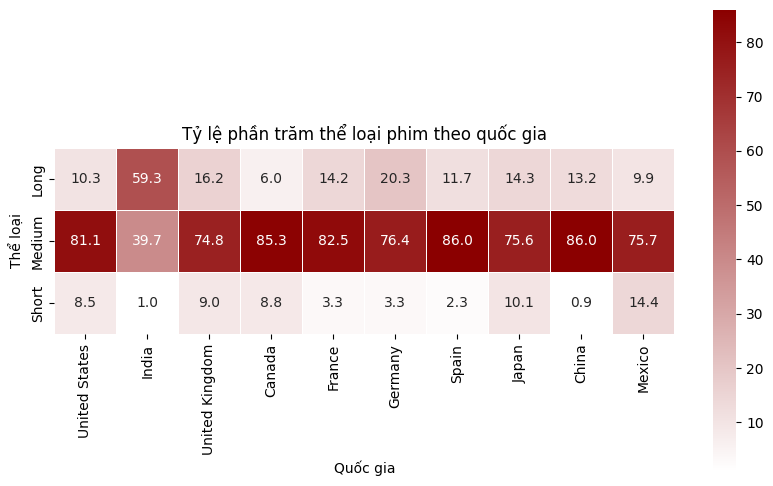

In [ ]:
cmap = mcolors.LinearSegmentedColormap.from_list("white_darkred", ["white", "#8B0000"])

# Đếm số lượng phim theo thể loại cho từng quốc gia
duration_counts = df_tmp.groupby(['country', 'duration_category']).size().unstack(fill_value=0)

# Tính tổng số lượng phim cho mỗi quốc gia
total_counts = duration_counts.sum(axis=1)

# Tính tỷ lệ phần trăm của từng thể loại trên tổng số phim của quốc gia đó
percentage_counts = duration_counts.div(total_counts, axis=0) * 100

# Chọn ra 10 quốc gia có tổng số lượng phim lớn nhất
top_countries = total_counts.sort_values(ascending=False).head(10).index
top_percentage_counts = percentage_counts.loc[top_countries]

# Xoay lại bảng để có 10 cột là quốc gia và 3 dòng là thể loại
top_percentage_counts = top_percentage_counts.T

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.heatmap(top_percentage_counts, annot=True, cmap=cmap, fmt=".1f", cbar=True, linewidths=0.5, square=True)
plt.title("Tỷ lệ phần trăm thể loại phim theo quốc gia")
plt.xlabel("Quốc gia")
plt.ylabel("Thể loại")
plt.show()

## 3. Phân phối theo nội dung và thể loại

In [ ]:
# Phân bố xếp hạng theo phim và chương trình truyền hình bằng heatmap
order = pd.DataFrame(df['rating'].value_counts().reset_index())
order.columns = ['rating', 'count']
rating_order = list(order['rating'])

### 3.1 Phân bố xếp hạng theo loại


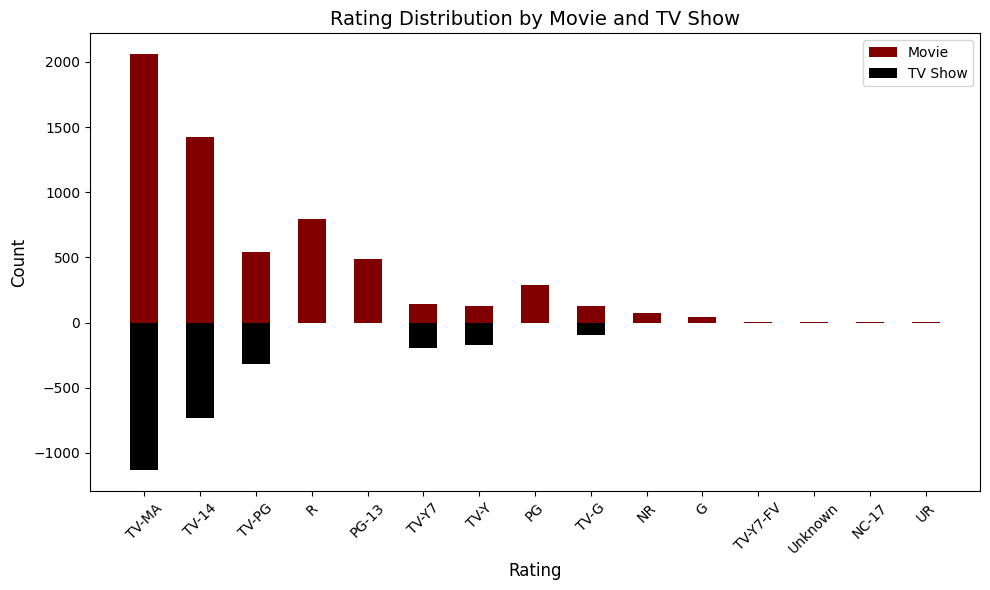

In [ ]:
# Tạo dữ liệu cho Movie và TV Show
mf = df.groupby('type')['rating'].value_counts().unstack().fillna(0).astype(int)

# Sắp xếp cột (rating) theo tổng số lượng (Movie + TV Show) từ nhiều nhất đến ít nhất
rating_order = mf.sum(axis=0).sort_values(ascending=False).index
mf = mf[rating_order]

movie = mf.loc['Movie']
tv = -mf.loc['TV Show']  # Dữ liệu TV Show được đặt âm để tạo hai phần

# Vẽ biểu đồ thanh
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(movie.index, movie, color='maroon', label='Movie', width=0.5)
ax.bar(tv.index, tv, color='black', label='TV Show', width=0.5)

# Cấu hình trục và nhãn
ax.set_title('Rating Distribution by Movie and TV Show', fontsize=14)
ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(range(len(mf.columns)))
ax.set_xticklabels(mf.columns, rotation=45, fontsize=10)
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### 3.2 Tỉ lệ phim theo đối tượng của từng quốc gia

In [ ]:
df_tmp = df.copy()
df_tmp = df_tmp[['content_type', 'country']]
df_tmp = df_tmp[df_tmp['country'] != 'Unknown']

In [ ]:
def split_columns(df, col_name):
    df = df.copy()
    new_rows = []

    for index, row in df.iterrows():
        # Tách các giá trị của country
        country_counts_values = row['country'].split(', ')

        # Duyệt qua tất cả các giá trị của country
        for country in country_counts_values:
                new_rows.append([row[col_name], country])

    df_new = pd.DataFrame(new_rows, columns=df.columns)
    return df_new

In [ ]:
df_tmp = split_columns(df_tmp, 'content_type')
df_tmp.head(11)

,content_type,country
0,Teen,United States
1,Adult,South Africa
2,Adult,India
3,Adult,United States
4,Adult,Ghana
5,Adult,Burkina Faso
6,Adult,United Kingdom
7,Adult,Germany
8,Adult,Ethiopia
9,Teen,United Kingdom


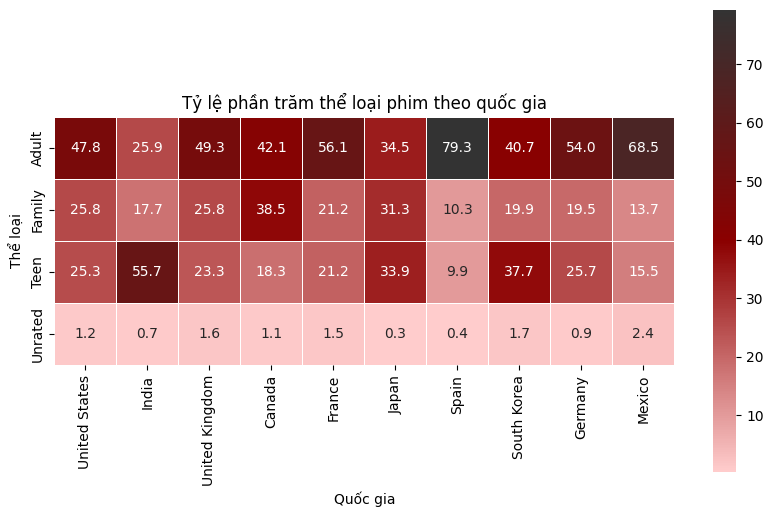

In [ ]:
# Chọn ra 10 quốc gia có tổng số lượng phim lớn nhất theo tỉ lệ
cmap = mcolors.LinearSegmentedColormap.from_list("lightred_darkred_darkgray", ["#FFCCCC", "#8B0000", "#333333"])
duration_counts = df_tmp.groupby(['country', 'content_type']).size().unstack(fill_value=0)
total_counts = duration_counts.sum(axis=1)
percentage_counts = duration_counts.div(total_counts, axis=0) * 100
top_countries = total_counts.sort_values(ascending=False).head(10).index
top_percentage_counts = percentage_counts.loc[top_countries]

# Xoay lại bảng để có 10 cột là quốc gia và 3 dòng là thể loại
top_percentage_counts = top_percentage_counts.T

# Vẽ Heatmap với bảng màu từ đỏ nhạt -> đỏ đô -> xám tối
plt.figure(figsize=(10, 6))  # Điều chỉnh kích thước để các ô có tỷ lệ vuông
sns.heatmap(top_percentage_counts, annot=True, cmap=cmap, fmt=".1f", cbar=True, linewidths=0.5, square=True)
plt.title("Tỷ lệ phần trăm thể loại phim theo quốc gia")
plt.xlabel("Quốc gia")
plt.ylabel("Thể loại")
plt.show()


### 3.3. Thể loại phim theo từng quốc gia

Text(0.5, 1.0, 'Top 20 thể loại phim có nhiều nội dung nhất')

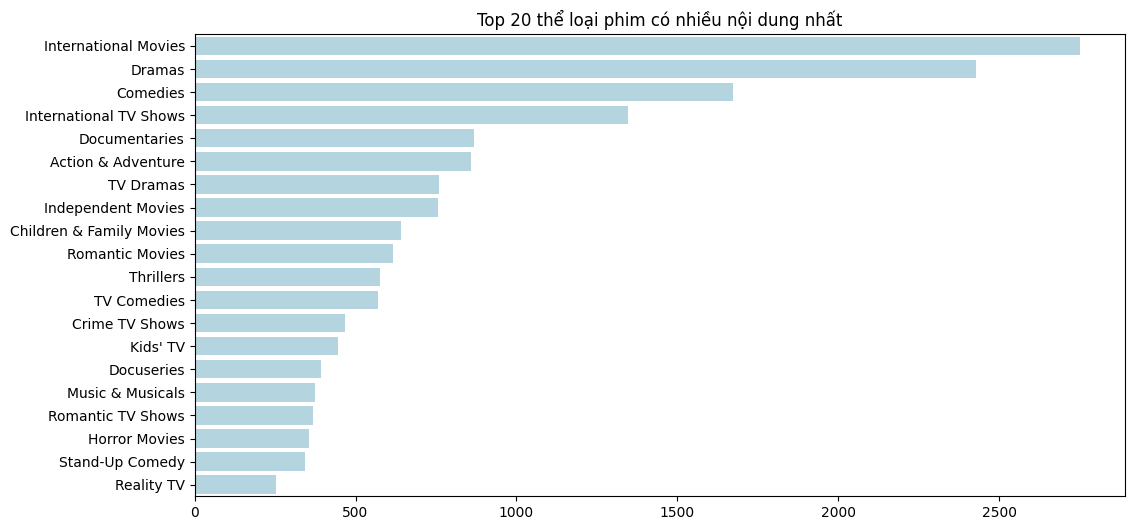

In [ ]:
# tạo 1 set chứa tất cả các values của column 'listed_in'
genres = set({})
for genre in df['listed_in'].unique():
    for g in genre.split(','):
        genres.add(g.strip())

# count mỗi thể loại xuất hiện bao nhiêu lần
genre_count = {}
for genre in df['listed_in']:
    for g in genre.split(','):
        g = g.strip()
        if g in genre_count:
            genre_count[g] += 1
        else:
            genre_count[g] = 1

# vẽ biểu đồ
top_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:20]

top_genres = dict(top_genres)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), color='lightblue')
plt.title('Top 20 thể loại phim có nhiều nội dung nhất')



### 3.4. Phân phối Châu lục, Thời lượng và Đối tượng Mục tiêu

In [ ]:
# Tạo cột 'color' trong dataframe để ánh xạ màu sắc cho từng giá trị của 'duration_category'
category_colors = {
    'Medium': 'lightblue',
    'is season': 'lightgreen',
    'Long': 'lightcoral',
    'Short': 'yellow'
}
df['color'] = df['duration_category'].map(category_colors)

# tạo cột mới 'first_region' lấy giá trị đầu tiên trong cột 'region'
df['first_region'] = df['region'].fillna('').apply(lambda x: x.split(',')[0].strip())


# Vẽ đồ thị parallel categories với màu sắc cho 'duration_category'
fig = px.parallel_categories(df,dimensions=['duration_category', 'content_type', 'first_region'], color='color', color_continuous_scale='Viridis')

# Hiển thị đồ thị
fig.show()


### 3.5. Các chương trình TV có nhiều mùa nhất

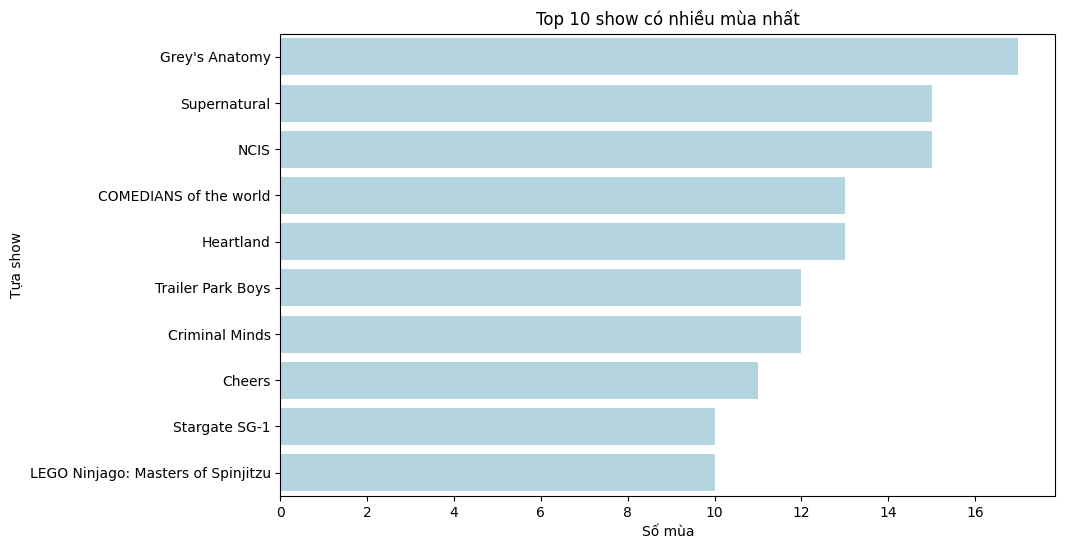

In [ ]:
# với column has_seasons, nếu có chứa 'has no season' thì bỏ qua, nếu không thì chuyển thành số và lưu vào cột season_count
df['season_count'] = df['has_seasons'].apply(lambda x: int(x.split()[0]) if 'has no season' not in x else None)

# Top 10 show có nhiều mùa nhất
top_seasons = df.sort_values(by='season_count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='season_count', y='title', data=top_seasons, color='lightblue')
plt.title('Top 10 show có nhiều mùa nhất')
plt.xlabel('Số mùa')
plt.ylabel('Tựa show')
plt.xticks()
plt.show()

